In [33]:
from matplotlib import pyplot as plt
from scipy.special import erf
import sys
sys.path.append('../')
import general as gen
import stats
import plotstyle as ps
from astropy.table import Table
plt.style.use(ps.styledict)
from scipy.stats import kstest, normaltest
import numpy as np

In [3]:
#relevant paths
PATH_CATS = gen.PATH_CATS
PATH_PLOTS = gen.PATH_PLOTS
PATH_SIMS = gen.PATH_SIMS
PATH_PARAMS = PATH_CATS + 'Schechter_params/'
PATH_COUNTS = PATH_CATS + 'Number_counts/'
#directory containing the simulated number counts (relevant only if plot_sims = True)
PATH_SIM_NC = PATH_CATS + 'Significance_tests/'
main_only = True


#catalogue containing delta values for each RQ and HLAGN/MLAGN analogue
data_rq = Table.read(PATH_CATS + 'RAGERS_COSMOS2020_matches_Mstar_z_rq_with_deltas.fits')
data_rl = Table.read(PATH_CATS + 'RAGERS_COSMOS2020_matches_Mstar_z_rl_with_deltas.fits')


In [4]:
for r in [1,2,4,6]:
    #get the delta values and lower uncertainties for the current radius
    delta_rq = data_rq[f'delta_{r}']
    edelta_lo_rq = data_rq[f'edelta_lo_{r}']
    edelta_hi_rq = data_rq[f'edelta_hi_{r}']
    delta_rl = data_rl[f'delta_{r}']
    edelta_lo_rl = data_rl[f'edelta_lo_{r}']
    edelta_hi_rl = data_rl[f'edelta_hi_{r}']
    #mask for identifying underdensities
    ud_mask_rq = delta_rq < 0.
    ud_mask_rl = delta_rl < 0.

    #calculate the ratio of delta to the relevant uncertainty
    X_rq = delta_rq / edelta_lo_rq
    X_rl = delta_rl / edelta_lo_rl
    X_rq[ud_mask_rq] = delta_rq[ud_mask_rq] / edelta_hi_rq[ud_mask_rq]
    X_rl[ud_mask_rl] = delta_rl[ud_mask_rl] / edelta_hi_rl[ud_mask_rl]
    
    print(kstest(X_rq, 'norm'))



KstestResult(statistic=0.3257257445640267, pvalue=4.718660091149895e-107, statistic_location=-0.44928713266937925, statistic_sign=-1)
KstestResult(statistic=0.0767233693024435, pvalue=3.1986485093453475e-06, statistic_location=1.2057476042880697, statistic_sign=1)
KstestResult(statistic=0.04697628365189477, pvalue=0.013324814755911948, statistic_location=1.3947159820652788, statistic_sign=1)
KstestResult(statistic=0.05607104984768746, pvalue=0.0015954320139887521, statistic_location=-1.3729342304000802, statistic_sign=1)


In [5]:
RA_rq = data_rq['ALPHA_J2000']
DEC_rq = data_rq['DELTA_J2000']
RA_rl = data_rl['ALPHA_J2000']
DEC_rl = data_rl['DELTA_J2000']

In [6]:
#identify galaxies with delta/sigma_delta < -1
below_m1sig_rq = X_rq < -1
below_m1sig_rl = X_rl < -1
#identify galaxies with delta/sigma_delta < -3
below_m3sig_rq = X_rq < -3
below_m3sig_rl = X_rl < -3


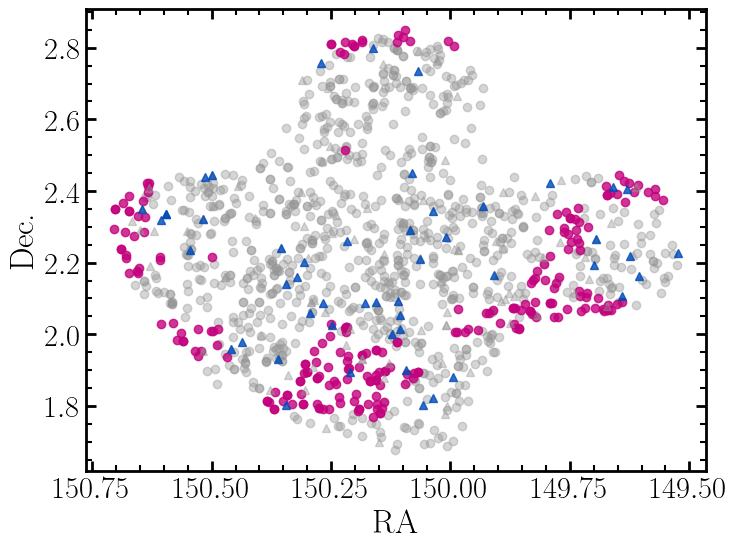

In [7]:
f, ax = plt.subplots(1,1)
ax.set_xlabel('RA')
ax.set_ylabel('Dec.')
ax.invert_xaxis()

ax.plot(RA_rq[~below_m1sig_rq], DEC_rq[~below_m1sig_rq], linestyle='none', marker='o', c=ps.grey, alpha=0.4)
ax.plot(RA_rq[below_m1sig_rq], DEC_rq[below_m1sig_rq], linestyle='none', marker='o', c=ps.magenta, alpha=0.8)

ax.plot(RA_rl[~below_m1sig_rl], DEC_rl[~below_m1sig_rl], linestyle='none', marker='^', c=ps.grey, alpha=0.4)
ax.plot(RA_rl[below_m1sig_rl], DEC_rl[below_m1sig_rl], linestyle='none', marker='^', c=ps.dark_blue, alpha=0.8)


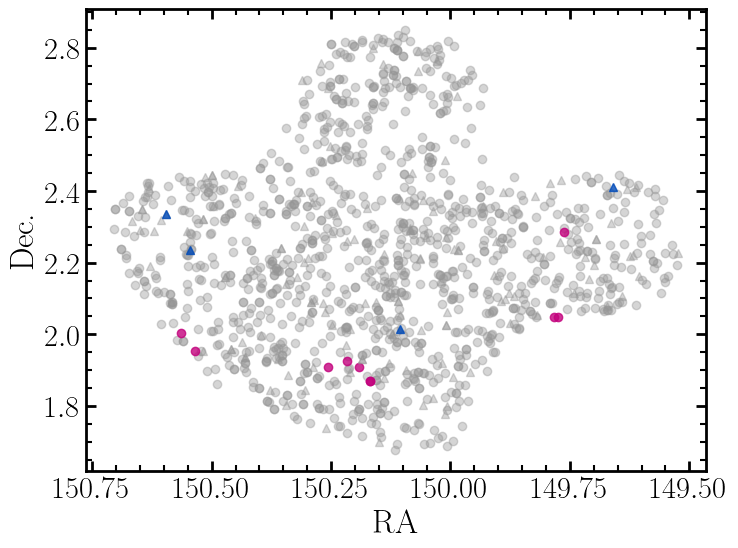

In [8]:
f, ax = plt.subplots(1,1)
ax.set_xlabel('RA')
ax.set_ylabel('Dec.')
ax.invert_xaxis()

ax.plot(RA_rq[~below_m3sig_rq], DEC_rq[~below_m3sig_rq], linestyle='none', marker='o', c=ps.grey, alpha=0.4)
ax.plot(RA_rq[below_m3sig_rq], DEC_rq[below_m3sig_rq], linestyle='none', marker='o', c=ps.magenta, alpha=0.8)

ax.plot(RA_rl[~below_m3sig_rl], DEC_rl[~below_m3sig_rl], linestyle='none', marker='^', c=ps.grey, alpha=0.4)
ax.plot(RA_rl[below_m3sig_rl], DEC_rl[below_m3sig_rl], linestyle='none', marker='^', c=ps.dark_blue, alpha=0.8)


In [9]:
data_rq.colnames

['RAGERS_ID',
 'RAGERS_z',
 'RAGERS_logMstar',
 'ALPHA_J2000',
 'DELTA_J2000',
 'ez_z_phot',
 'ez_z160',
 'ez_z840',
 'ez_mass',
 'ez_mass_p160',
 'ez_mass_p840',
 'ez_sfr',
 'ez_sfr_p160',
 'ez_sfr_p840',
 'ez_restU',
 'ez_restU_err',
 'ez_restB',
 'ez_restB_err',
 'ez_restV',
 'ez_restV_err',
 'ez_restJ',
 'ez_restJ_err',
 'lp_MNUV',
 'lp_MR',
 'lp_MJ',
 'ID_VLA',
 'RA_VLA_J2000',
 'DEC_VLA_J2000',
 'MULTI',
 'CAT_CPT',
 'ID_CPT',
 'RA_CPT_J2000',
 'DEC_CPT_J2000',
 'SEP_VLA_CPT',
 'P_FALSE',
 'Z_BEST',
 'FLUX_INT_3GHz',
 'Lradio_10cm',
 'Lradio_21cm',
 'L_TIR_SF',
 'SFR_KENN98',
 'Xray_AGN',
 'MIR_AGN',
 'SED_AGN',
 'Quiescent_MLAGN',
 'SFG',
 'Clean_SFG',
 'HLAGN',
 'MLAGN',
 'Radio_excess',
 'flag_COSMOS2015',
 'spec_index',
 'Lradio_60cm',
 'N_submm_1',
 'delta_1',
 'edelta_lo_1',
 'edelta_hi_1',
 'nsig_delta_1',
 'N_submm_2',
 'delta_2',
 'edelta_lo_2',
 'edelta_hi_2',
 'nsig_delta_2',
 'N_submm_4',
 'delta_4',
 'edelta_lo_4',
 'edelta_hi_4',
 'nsig_delta_4',
 'N_submm_6',
 'del

In [45]:
from stats import random_gaussian

p1 = []
p3 = []
for i in range(10000):
    G = random_gaussian(0, 1, 148)
    p1.append((G < -1).sum())
    p3.append((G < -3).sum())

In [51]:
p1 = np.array(p1) / 148
p3 = np.array(p3) / 148

In [52]:
(p1 >= 50/148).sum()

0

In [53]:
(p3 > 5/148).sum()

0

In [49]:
197/1128

0.17464539007092197